In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [22]:
original_image = cv2.imread("../images/tezja.jpeg")
img = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# tsza gdzieś tu dorobić zmniejszanie obrazka bo dla takich dużcyh 4000x3000 długo mieli długo z 2,5 min

#noiseless_image = cv2.fastNlMeansDenoisingColored(original_image,None,30,30,21,41)

#noiseless_image = cv2.blur(original_image,(10,10)) #do wyjebania
#noiseless_image = cv2.GaussianBlur(original_image,(21,21),0) # gaus też spoko
noiseless_image = cv2.medianBlur(original_image, 15) # na razie top (default=15)
#noiseless_image = cv2.blur(original_image,(10,10)) # tu przetestować tego czwartego

vectorized = noiseless_image.reshape((-1,3))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 17 # (default = 17)
attempts = 10
ret, label, center = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)

res = center[label.flatten()]
result_image = res.reshape((img.shape))

#noiseless_image_colored = cv2.fastNlMeansDenoisingColored(result_image,None,20,20,7,21)

result = cv2.imwrite('../images/tezja_medianblur3.jpg', result_image)


In [ ]:
plt.figure(figsize=(32,18))
plt.imshow(img)
plt.show()

In [ ]:
plt.figure(figsize=(32,18))
plt.imshow(result_image)
plt.show()

In [ ]:
plt.figure(figsize=(32,18))
plt.imshow(noiseless_image)
plt.show()

In [1]:
from skimage.morphology import skeletonize
import numpy as np

# Define your binary matrix
matrix = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0]
], dtype=bool)

# Apply skeletonization
skeleton = skeletonize(matrix)

print("Original Matrix:\n", matrix.astype(int))
print("Skeletonized Matrix:\n", skeleton.astype(int))
import numpy as np

# Define your binary matrix
matrix = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0]
], dtype=bool)

# Apply skeletonization
skeleton = skeletonize(matrix)

print("Original Matrix:\n", matrix.astype(int))
print("Skeletonized Matrix:\n", skeleton.astype(int))

Original Matrix:
 [[0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0]]
Skeletonized Matrix:
 [[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 1 1 1 1 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


In [3]:
result_image = cv2.imread("../scripts/col17.png")

In [23]:
# Borders
image_shape = result_image.shape
borders = np.zeros((image_shape[0], image_shape[1]))

# Vertical
for i in range(image_shape[0]):
    for j in range(image_shape[1] - 1):
        if not np.array_equal(result_image[i][j], result_image[i][j + 1]):
            borders[i][j] = 1

# Horizontal
for i in range(image_shape[0] - 1):
    for j in range(image_shape[1]):
        if not np.array_equal(result_image[i][j], result_image[i + 1][j]):
            borders[i][j] = 1

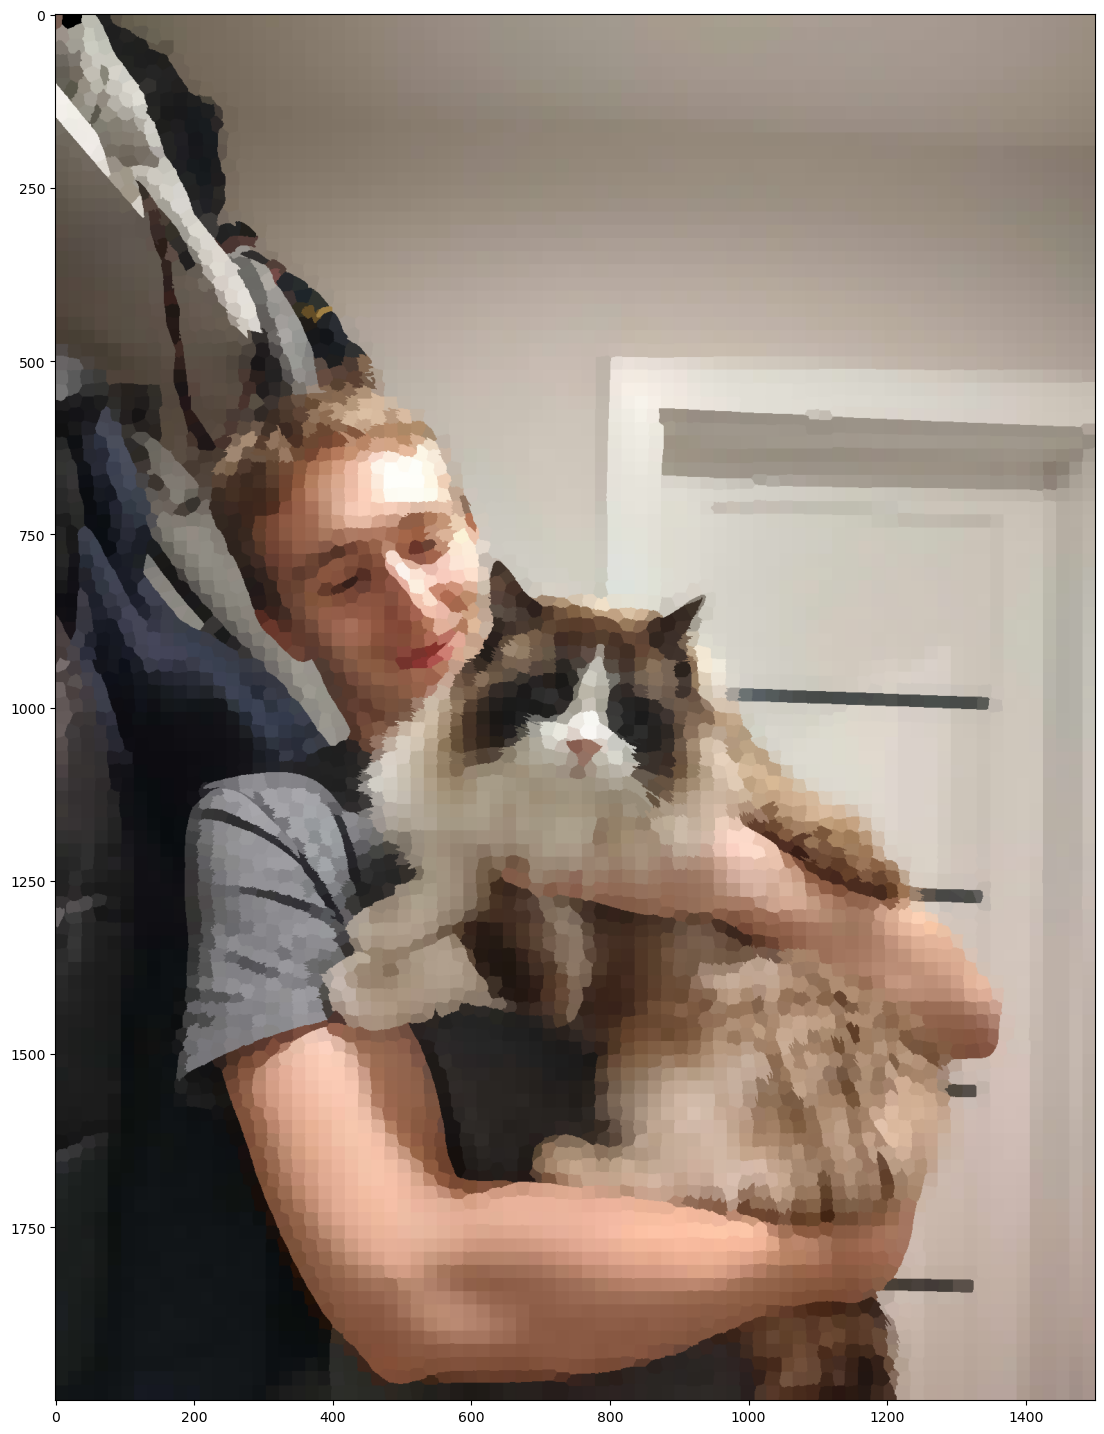

In [65]:
from skimage import segmentation, color
import skimage

img = skimage.io.imread("../images/jakub.jpg")

labels1 = segmentation.slic(img, compactness=30, n_segments=10000, start_label=0)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=1)

plt.figure(figsize=(32, 18))
plt.imshow(out1)
plt.show()

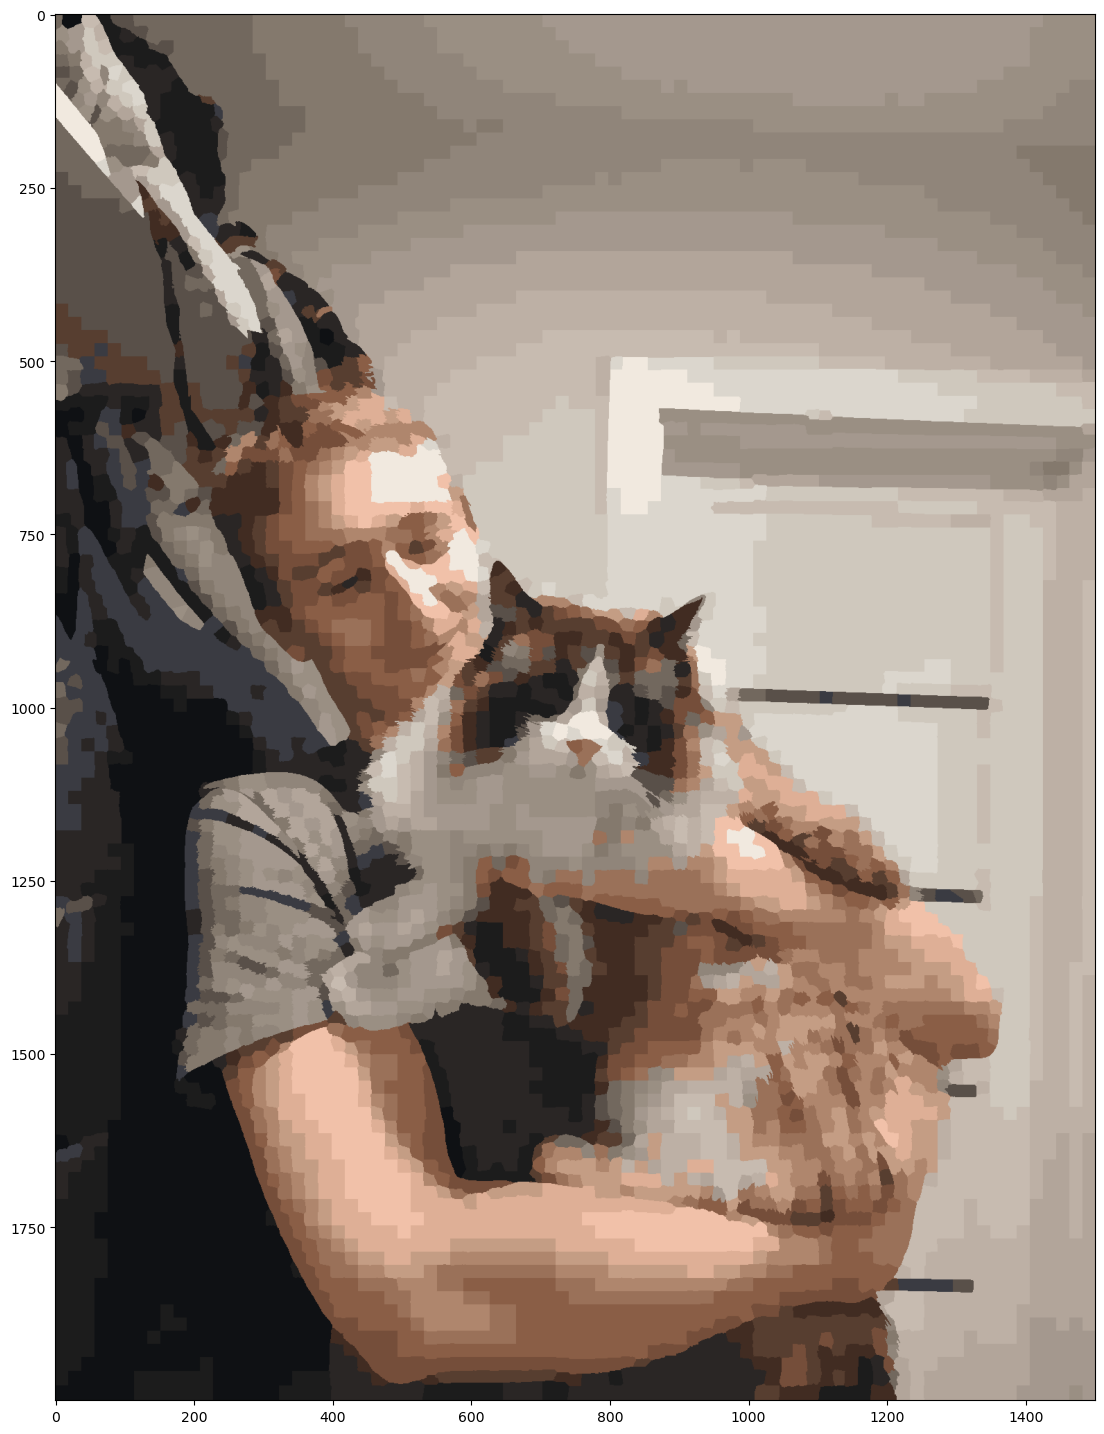

In [66]:
vectorized = out1.reshape((-1,3))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 25 # (default = 17)
attempts = 10
ret, label, center = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)

res = center[label.flatten()]
result_image = res.reshape(img.shape)

plt.figure(figsize=(32, 18))
plt.imshow(result_image)
plt.show()

In [67]:
image_shape = result_image.shape
borders = np.zeros((image_shape[0], image_shape[1]))

# Vertical
for i in range(image_shape[0]):
    for j in range(image_shape[1] - 1):
        if not np.array_equal(result_image[i][j], result_image[i][j + 1]):
            borders[i][j] = 1

# Horizontal
for i in range(image_shape[0] - 1):
    for j in range(image_shape[1]):
        if not np.array_equal(result_image[i][j], result_image[i + 1][j]):
            borders[i][j] = 1

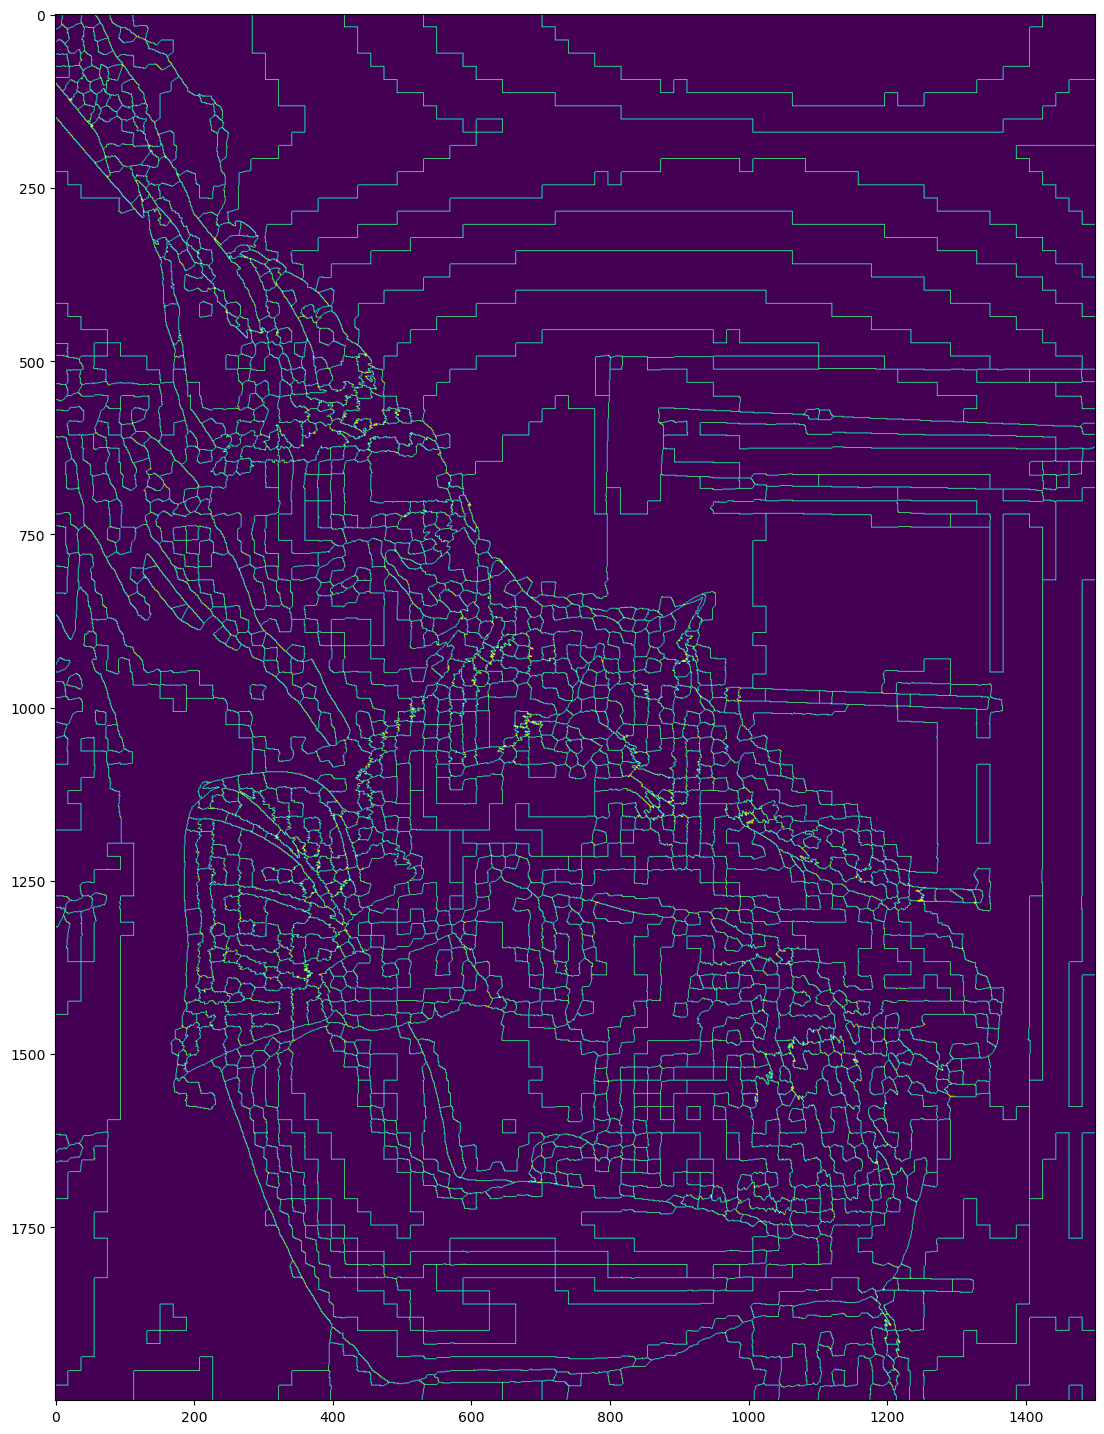

In [68]:
plt.figure(figsize=(32, 18))
plt.imshow(borders)
plt.show()

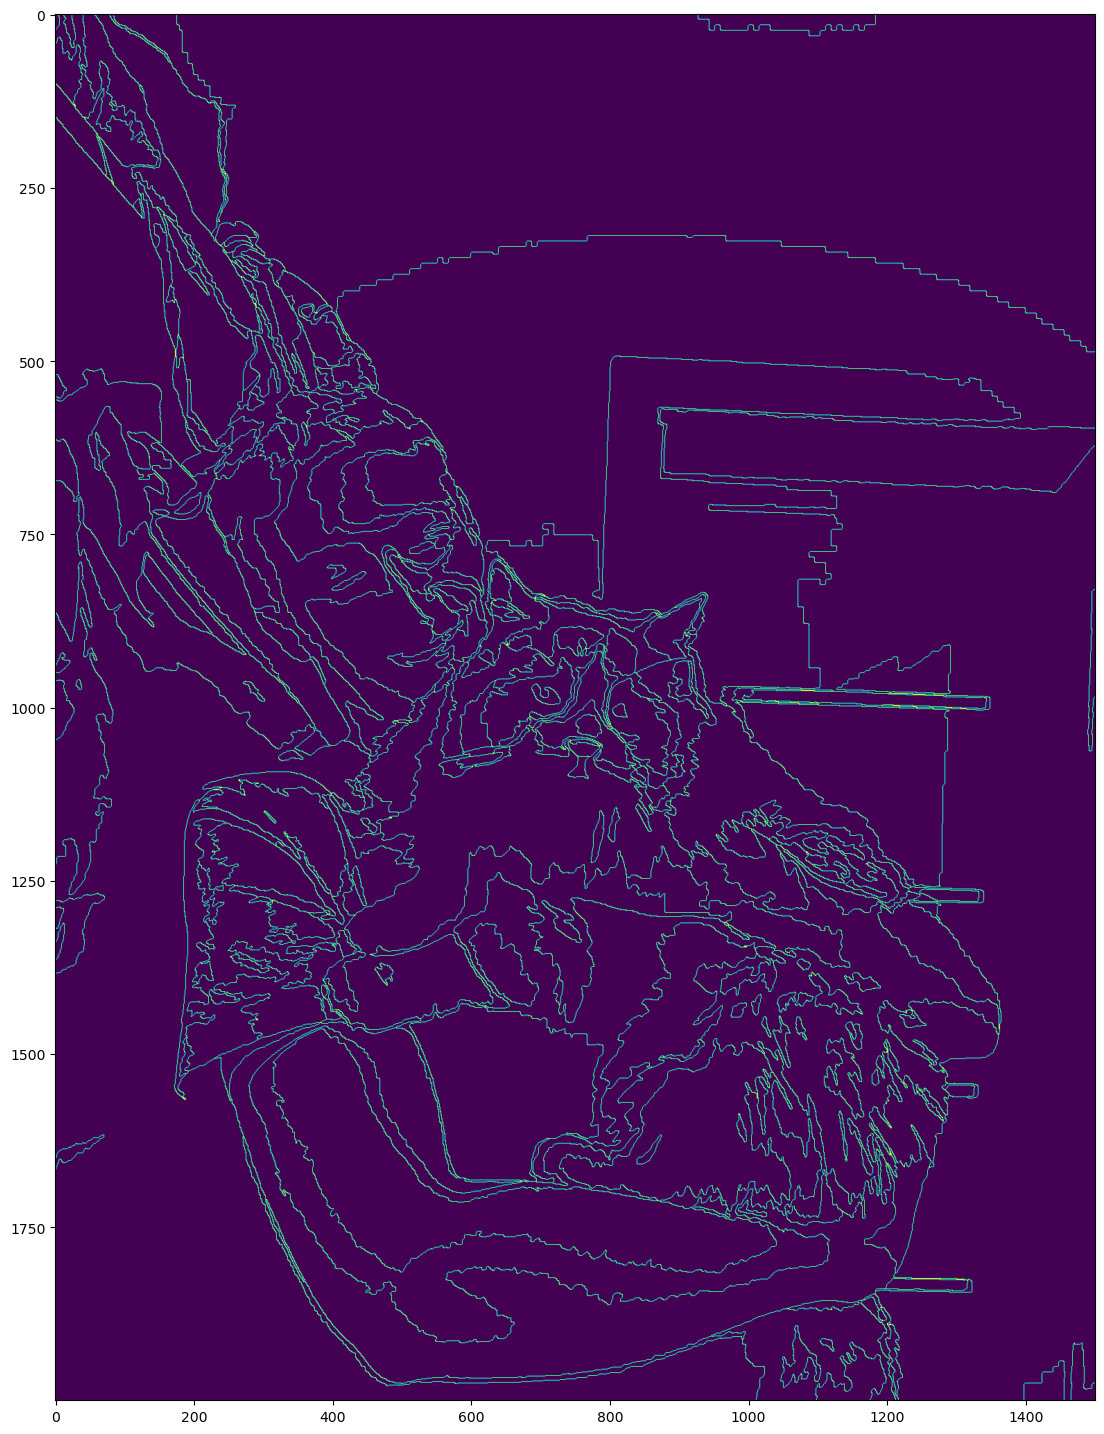

In [24]:
plt.figure(figsize=(32, 18))
plt.imshow(borders)
plt.show()

In [62]:
def return_colors(image):
    unique_colors = np.unique(image.reshape(-1, 3), axis=0)
    return unique_colors

In [5]:
colors = return_colors(result_image)

In [63]:
len(return_colors(out1))

620

In [42]:
mask = cv2.inRange(result_image, colors[2], colors[2])

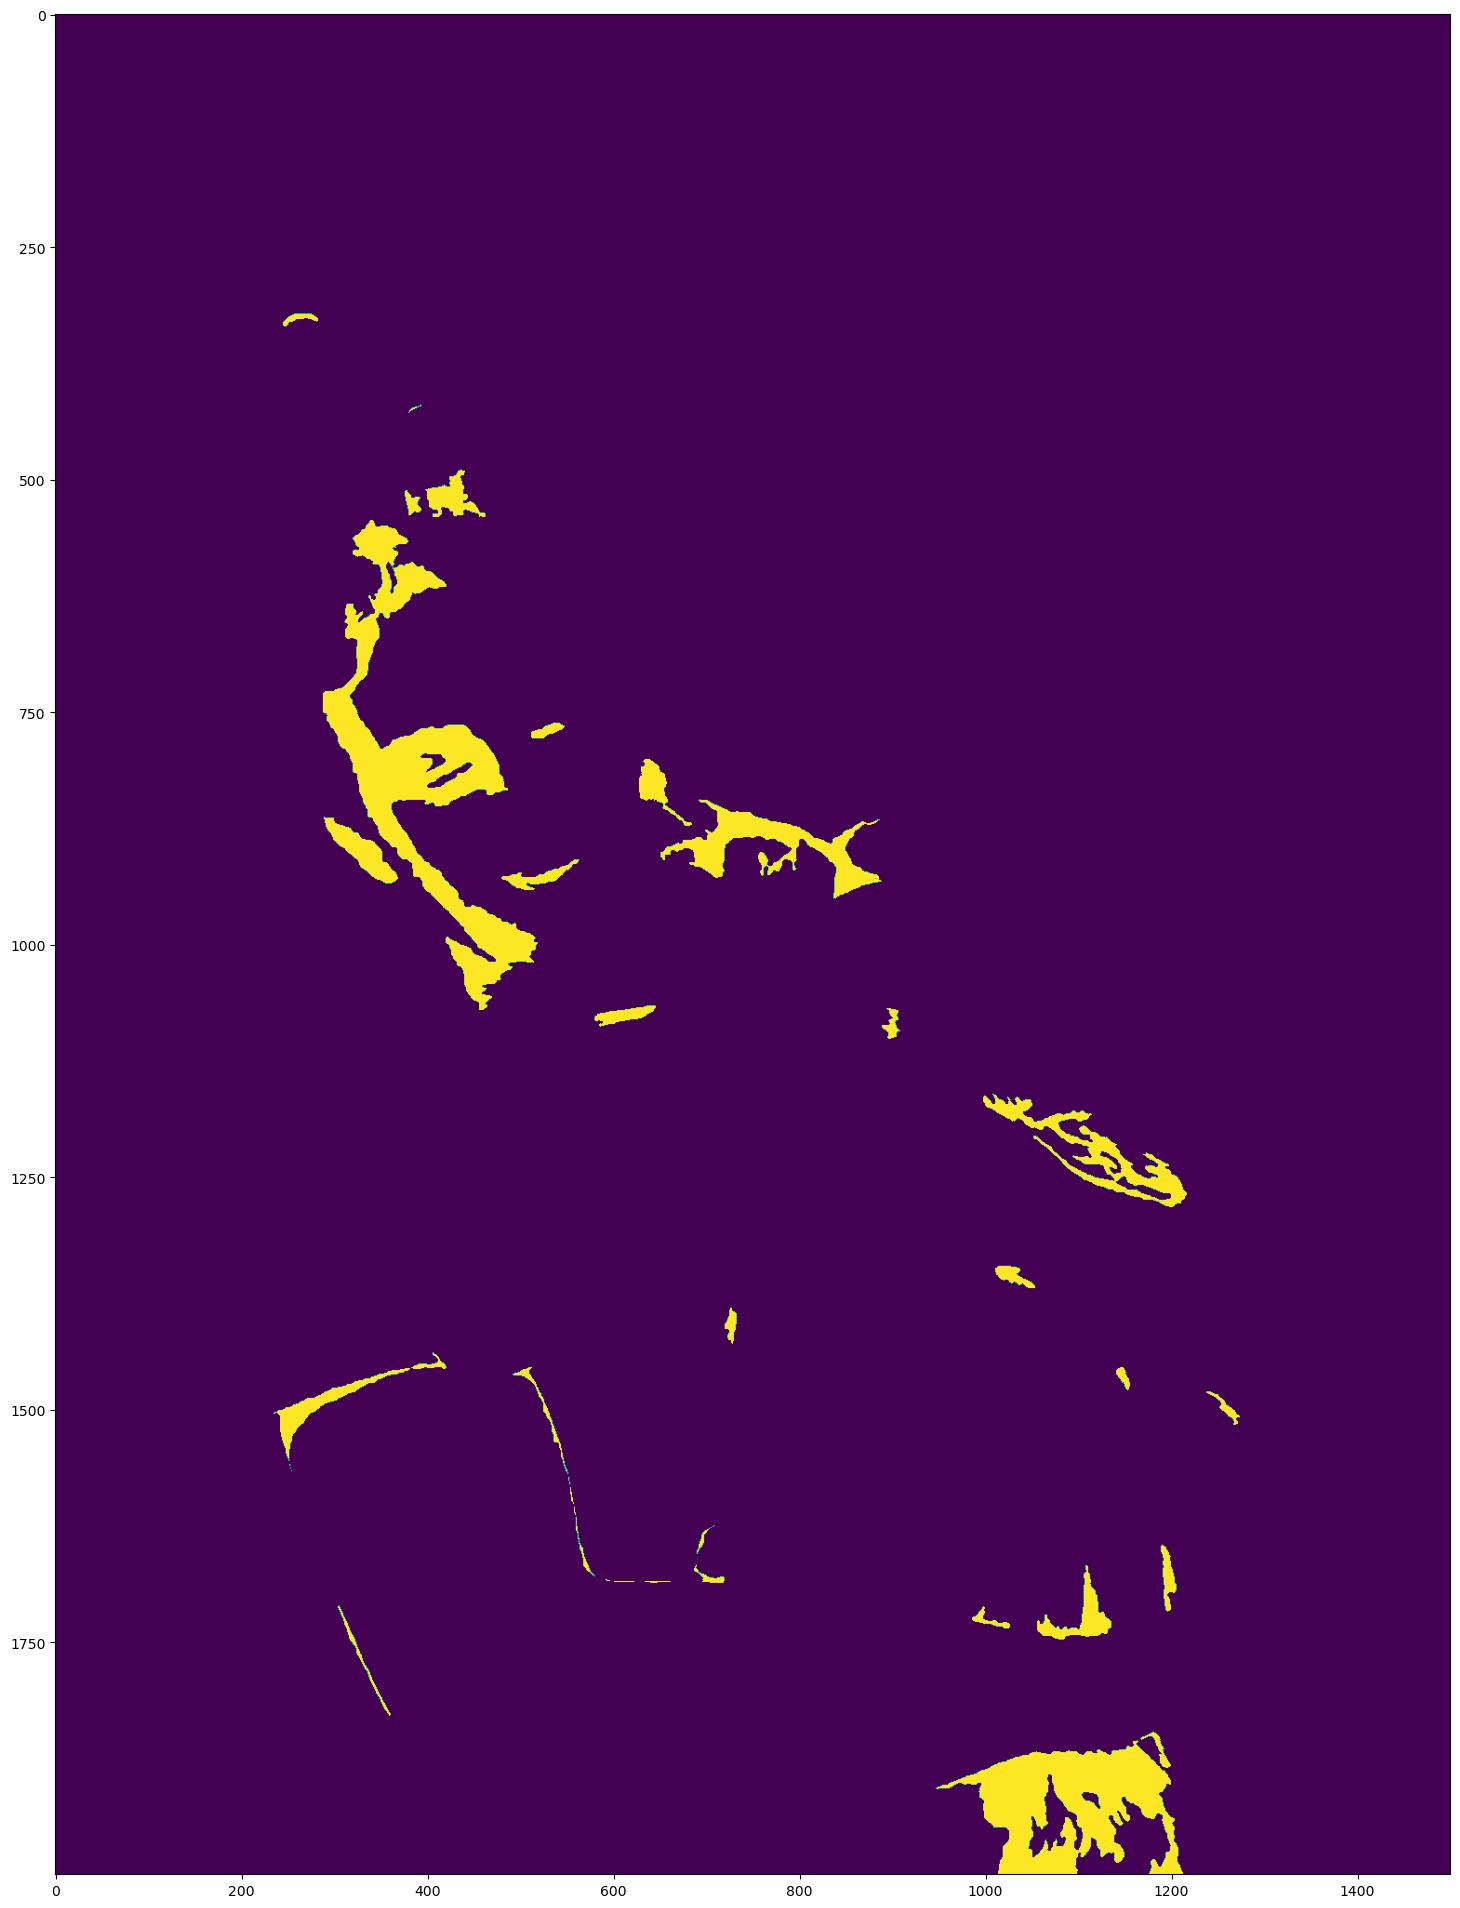

In [43]:
plt.figure(figsize=(18, 32))
plt.imshow(mask)

In [12]:
colored_output = cv2.bitwise_and(result_image, result_image, mask=mask)

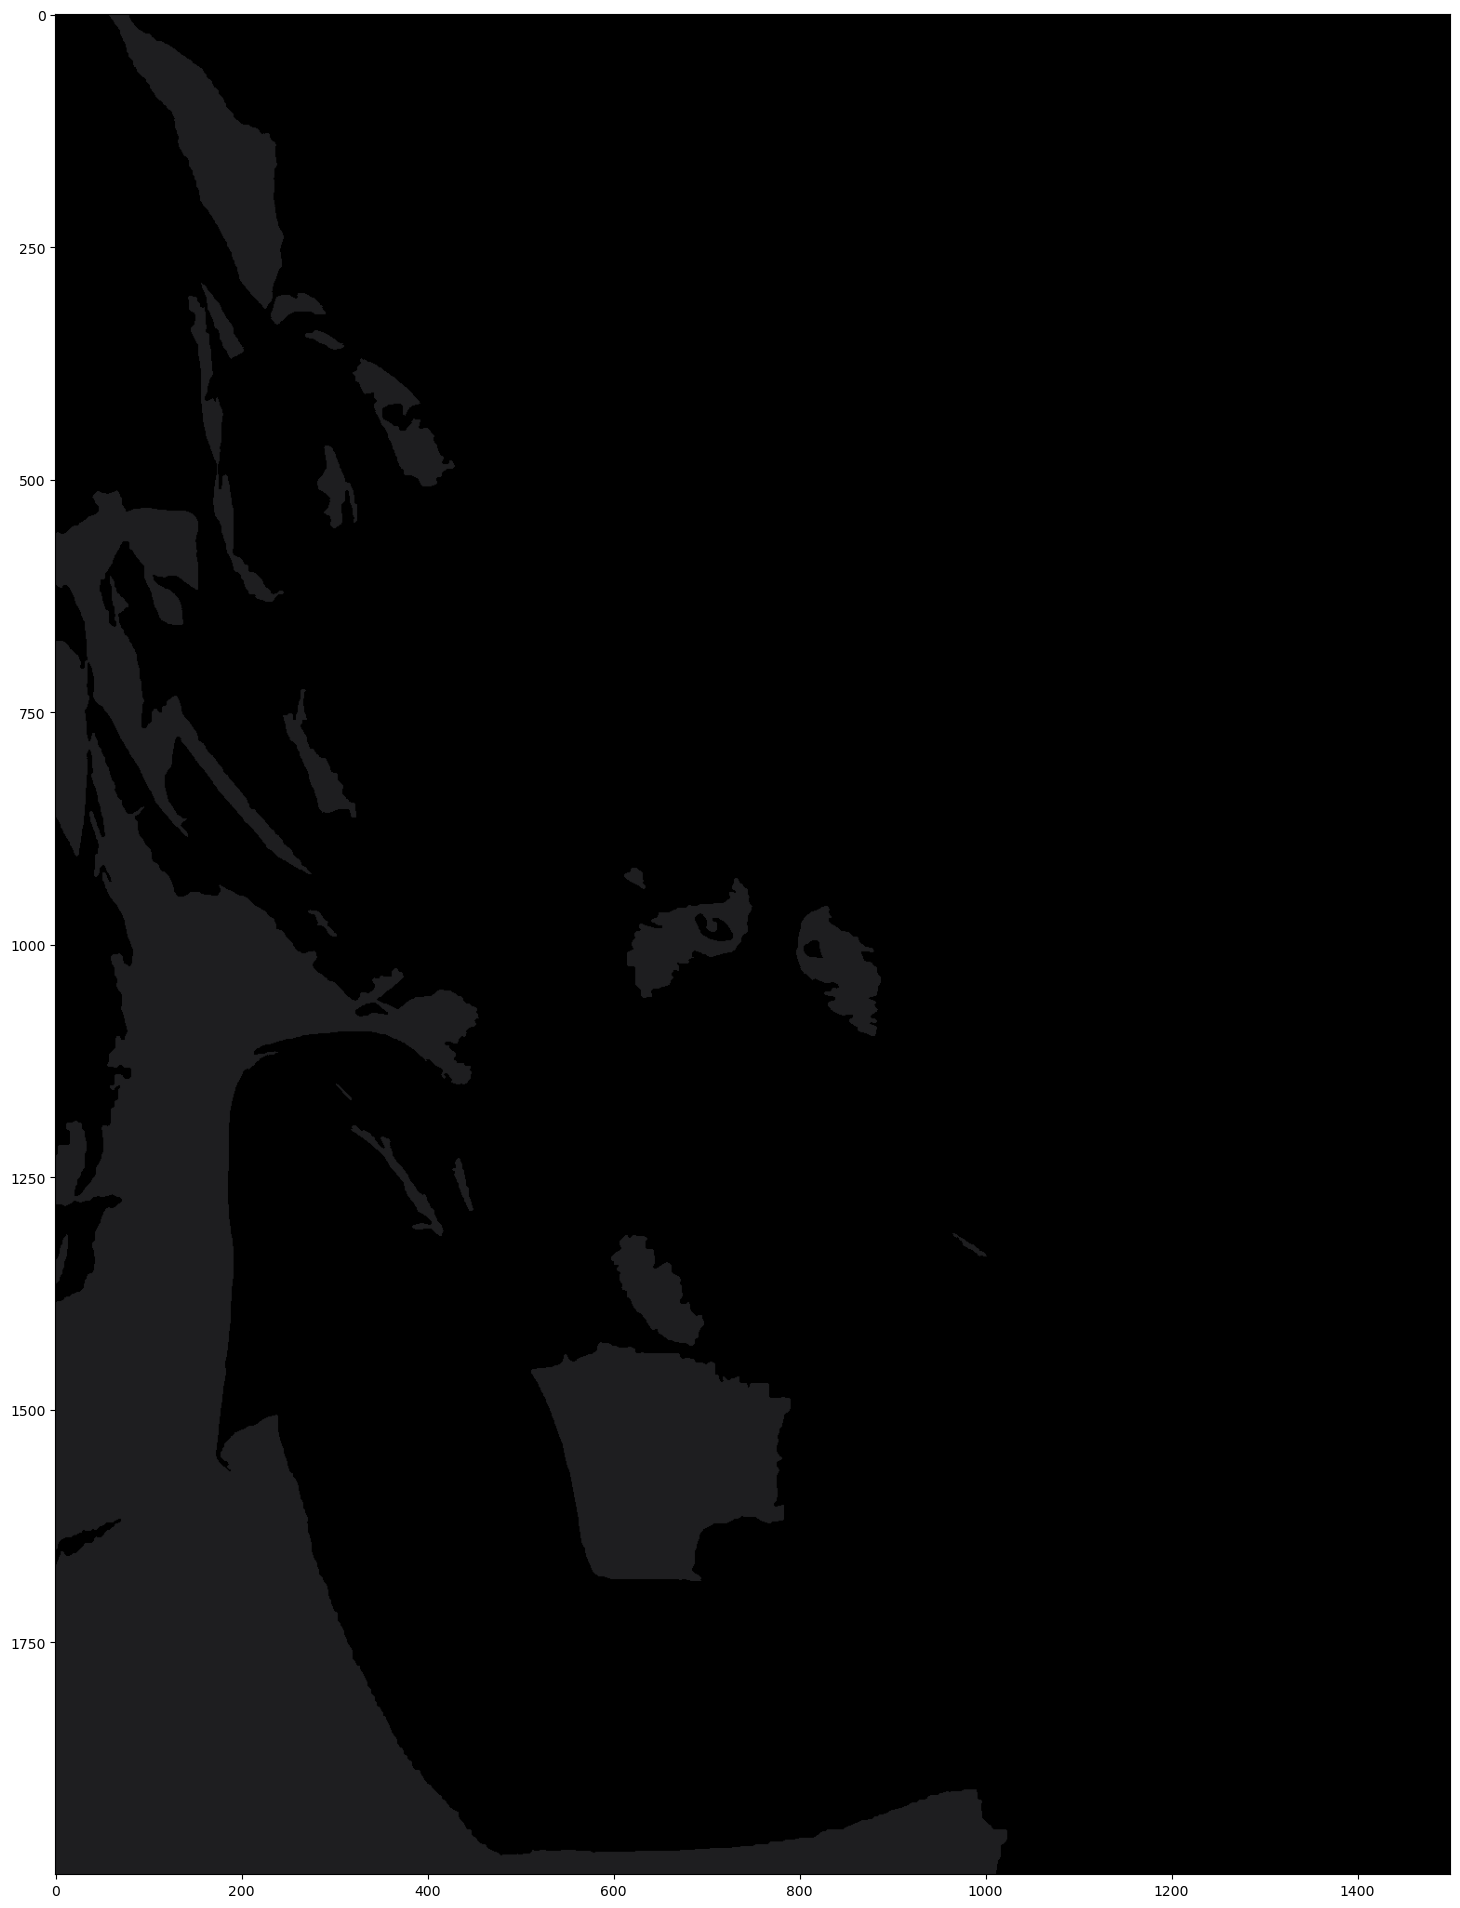

In [13]:
plt.figure(figsize=(18, 32))
plt.imshow(colored_output)

In [15]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [25]:
number_of_areas = len(contours)
number_of_areas


20

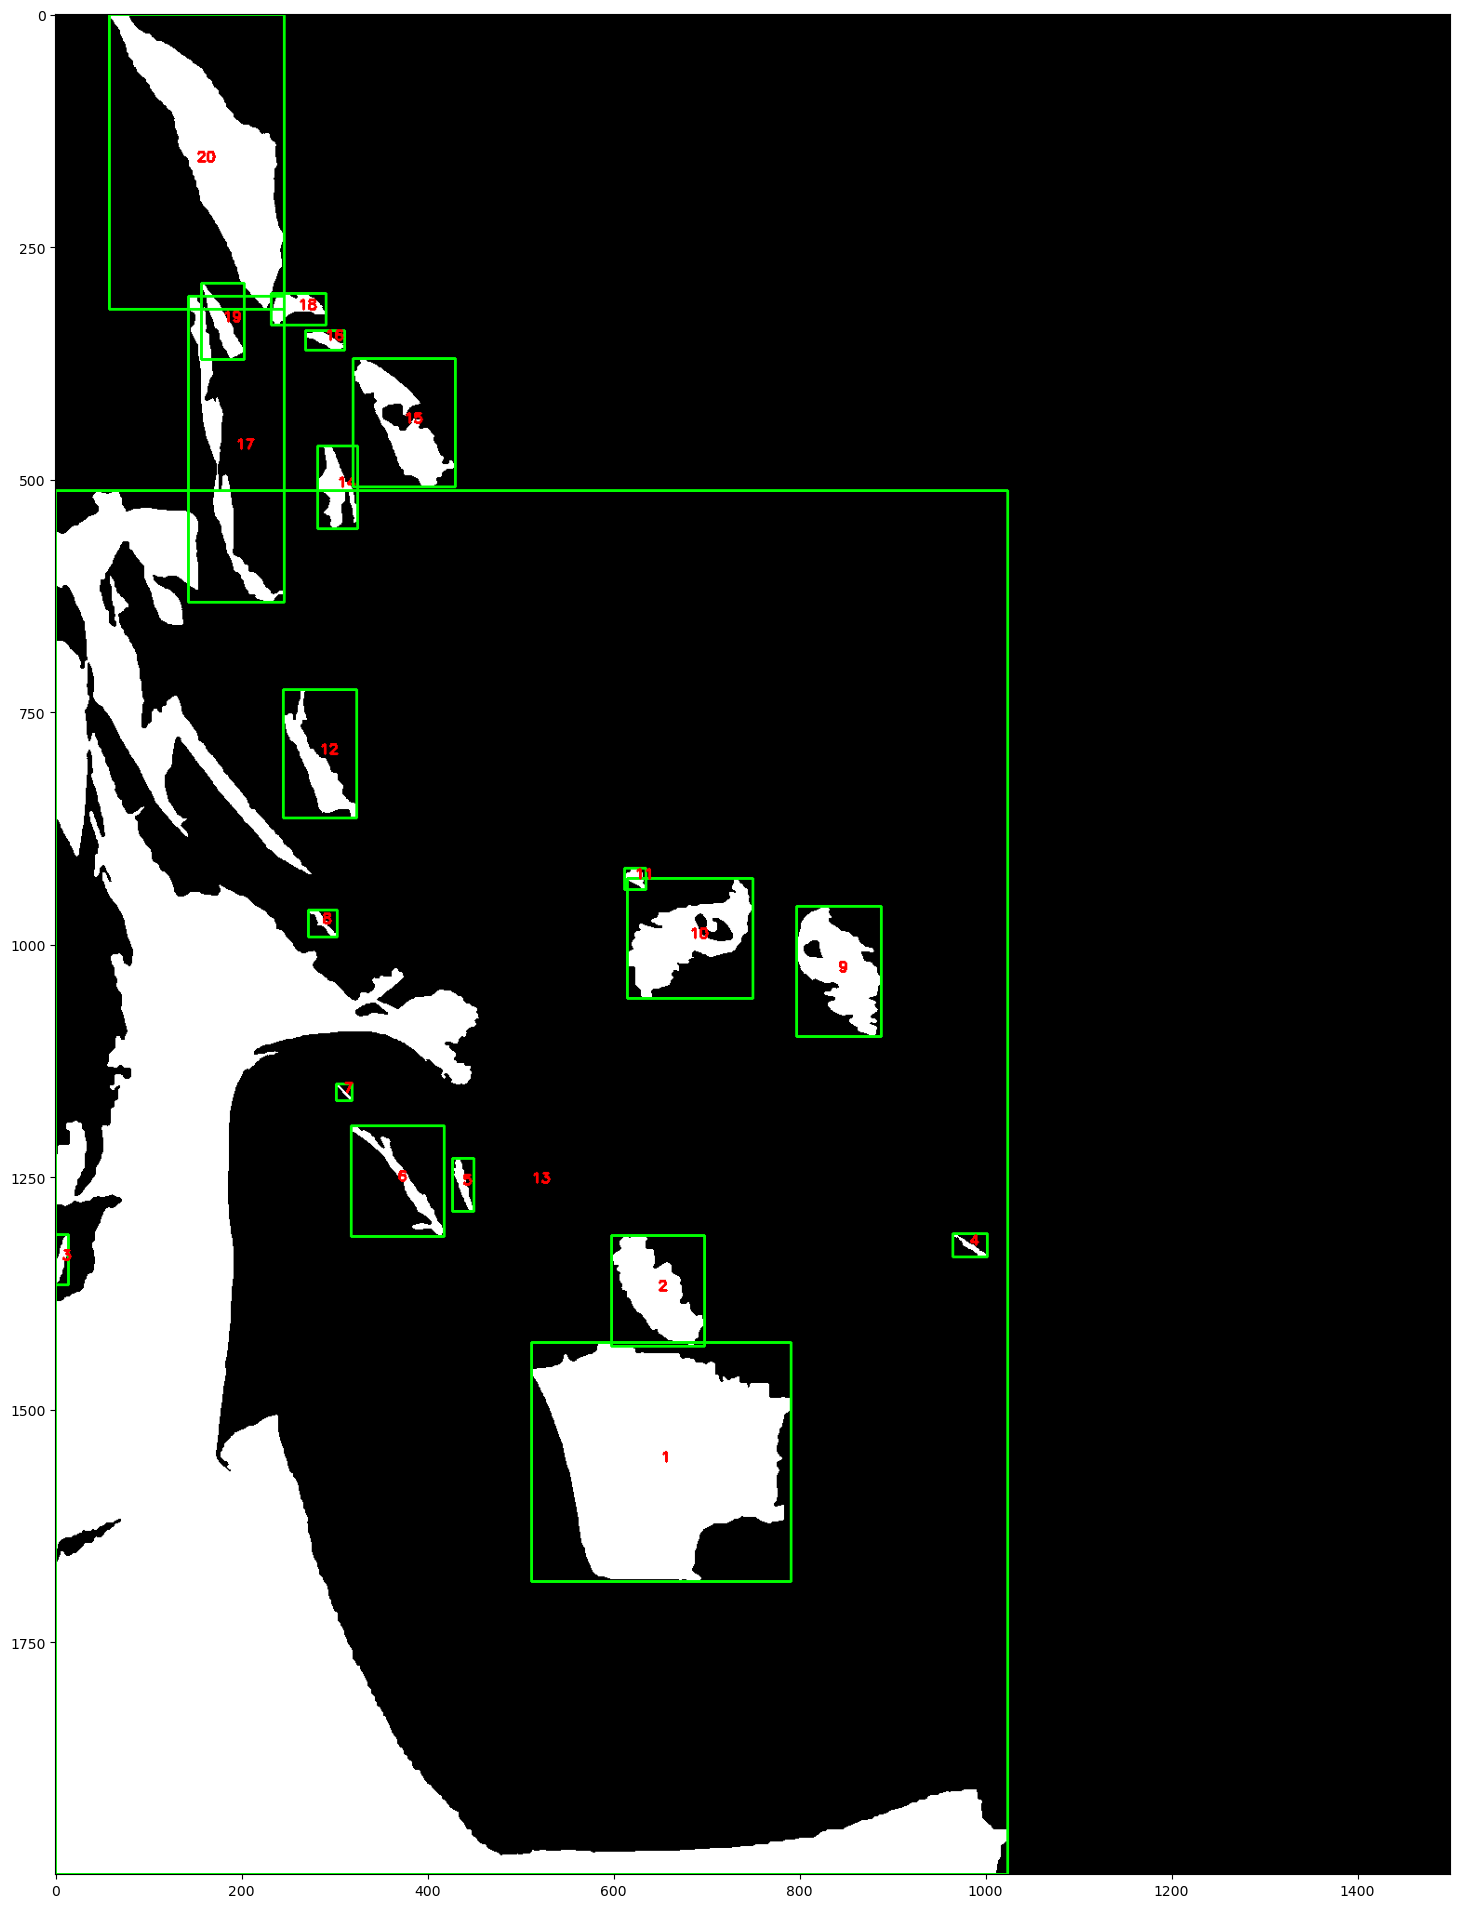

In [26]:
# Prepare the image for drawing (convert single channel mask to BGR)
output_image = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Loop over all found contours
for i, contour in enumerate(contours):
    # Get bounding box coordinates
    x, y, w, h = cv2.boundingRect(contour)

    # Draw a rectangle around each contour
    cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Calculate coordinates for the text: placing numbers in the center of the bounding box
    cx, cy = x + w // 2, y + h // 2

    # Draw the index of the contour
    cv2.putText(output_image, str(i + 1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
plt.figure(figsize=(18, 32))
plt.imshow(output_image)

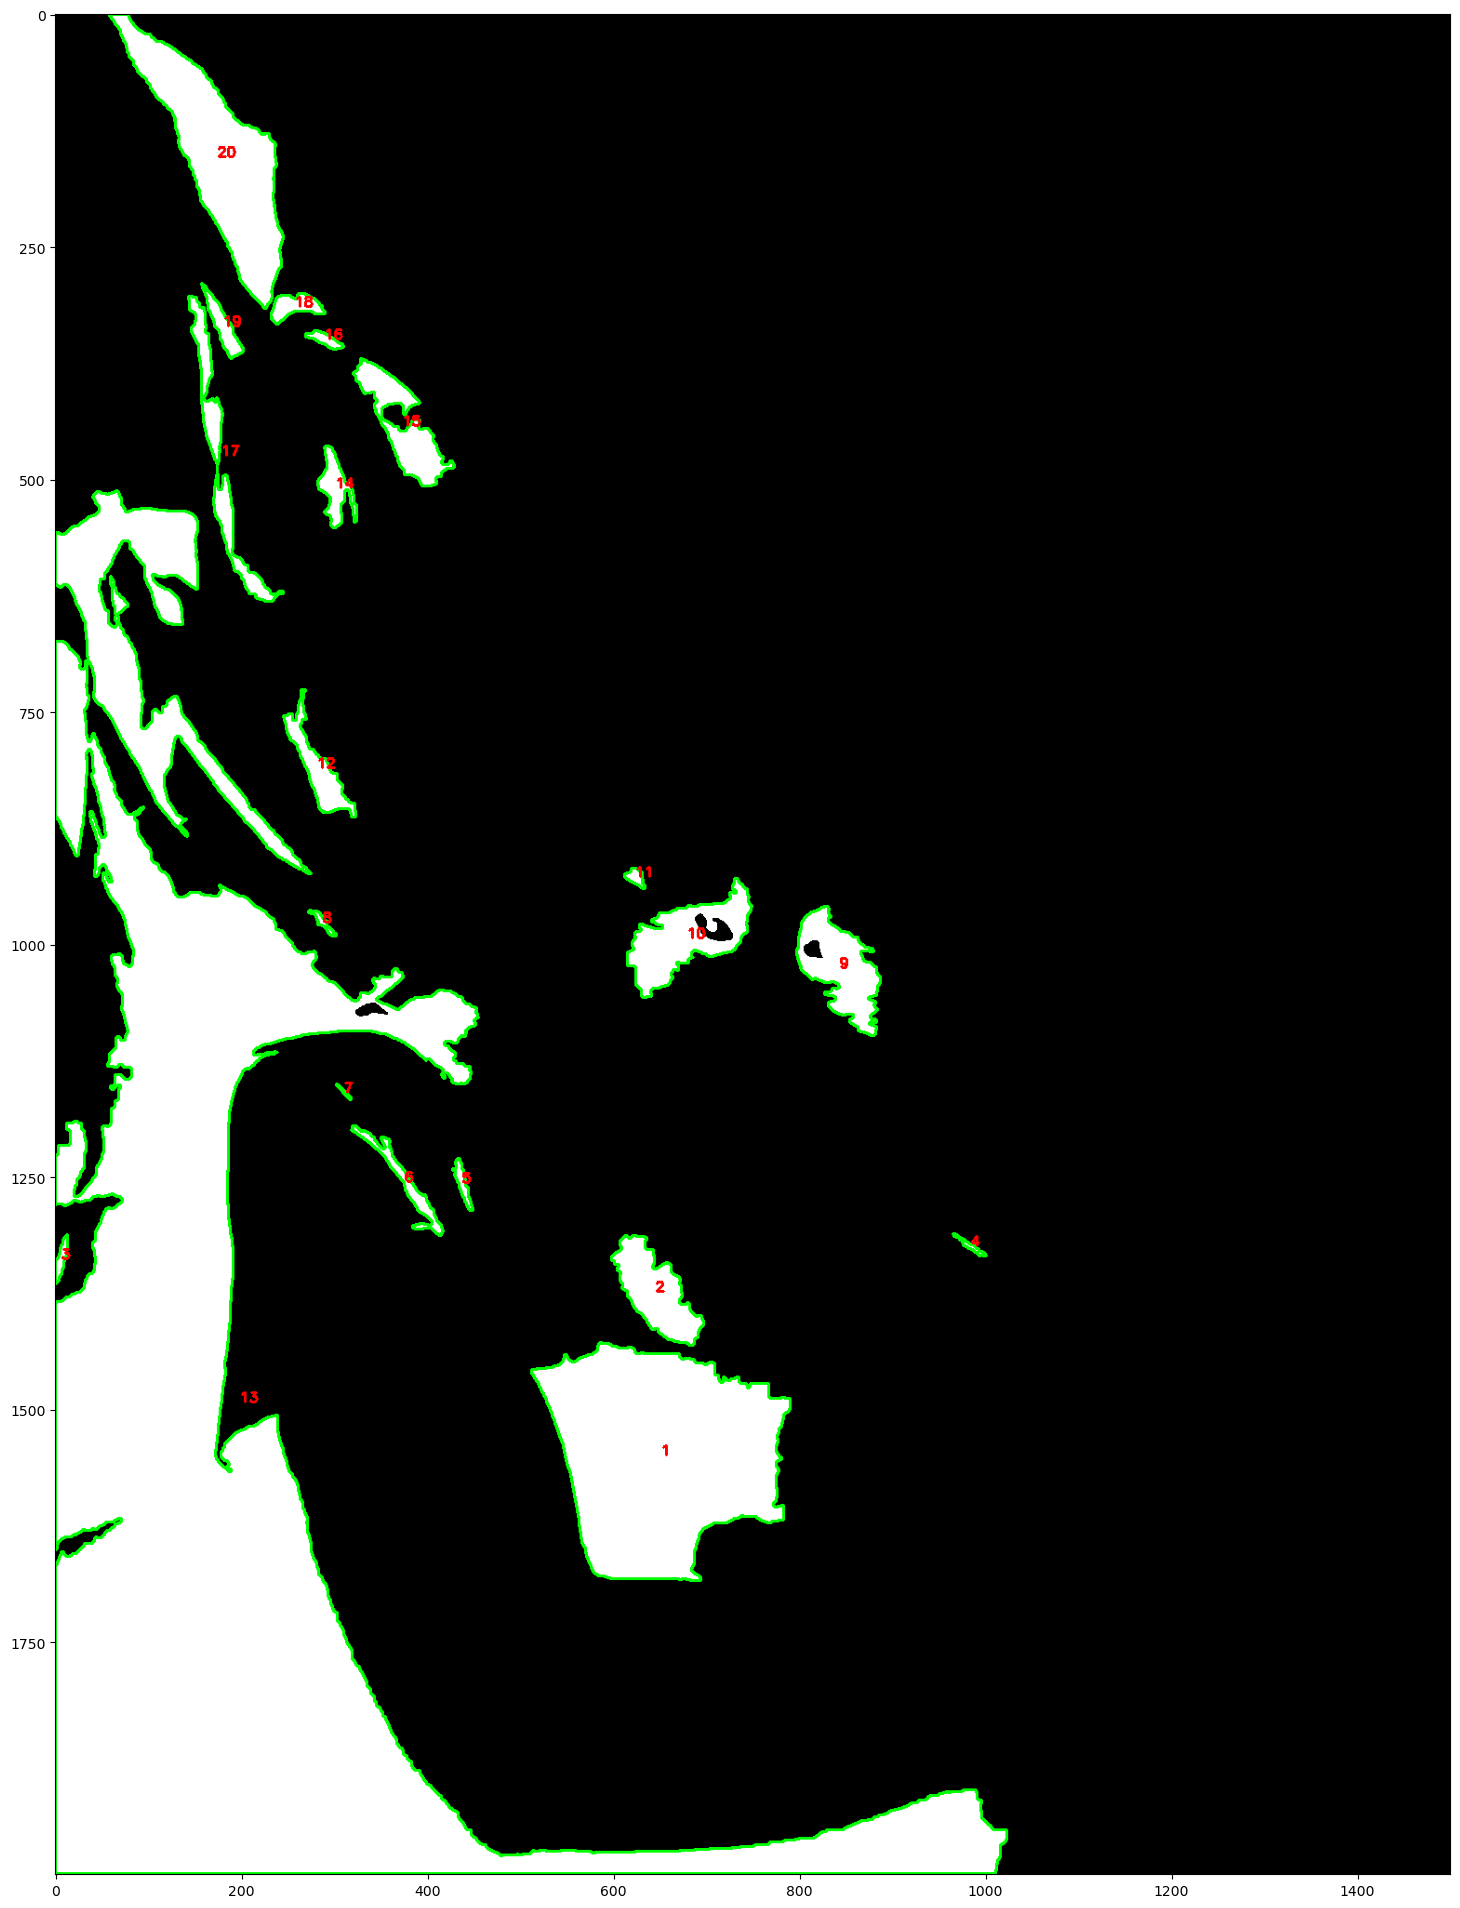

In [27]:
# Prepare the image for drawing (convert single channel mask to BGR)
output_image = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Loop over all found contours
for i, contour in enumerate(contours):
    # Calculate moments for each contour
    M = cv2.moments(contour)

    if M["m00"] != 0:
        # Calculate x, y coordinate of center
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        # Set some default values in case of error
        cX, cY = 0, 0

    # Draw the contour and center of the shape on the image
    cv2.drawContours(output_image, [contour], -1, (0, 255, 0), 2)
    cv2.putText(output_image, str(i + 1), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
plt.figure(figsize=(18, 32))
plt.imshow(output_image)

Area of contour 1: 47575.0
Area of contour 2: 5622.5
Area of contour 3: 329.0
Area of contour 4: 147.0
Area of contour 5: 392.5
Area of contour 6: 1444.0
Area of contour 7: 39.0
Area of contour 8: 192.5
Area of contour 9: 6580.5
Area of contour 10: 7694.0
Area of contour 11: 255.5
Area of contour 12: 2630.5
Area of contour 13: 324198.5
Area of contour 14: 1588.5
Area of contour 15: 4701.5
Area of contour 16: 352.5
Area of contour 17: 4136.5
Area of contour 18: 1007.5
Area of contour 19: 1031.0
Area of contour 20: 19383.5


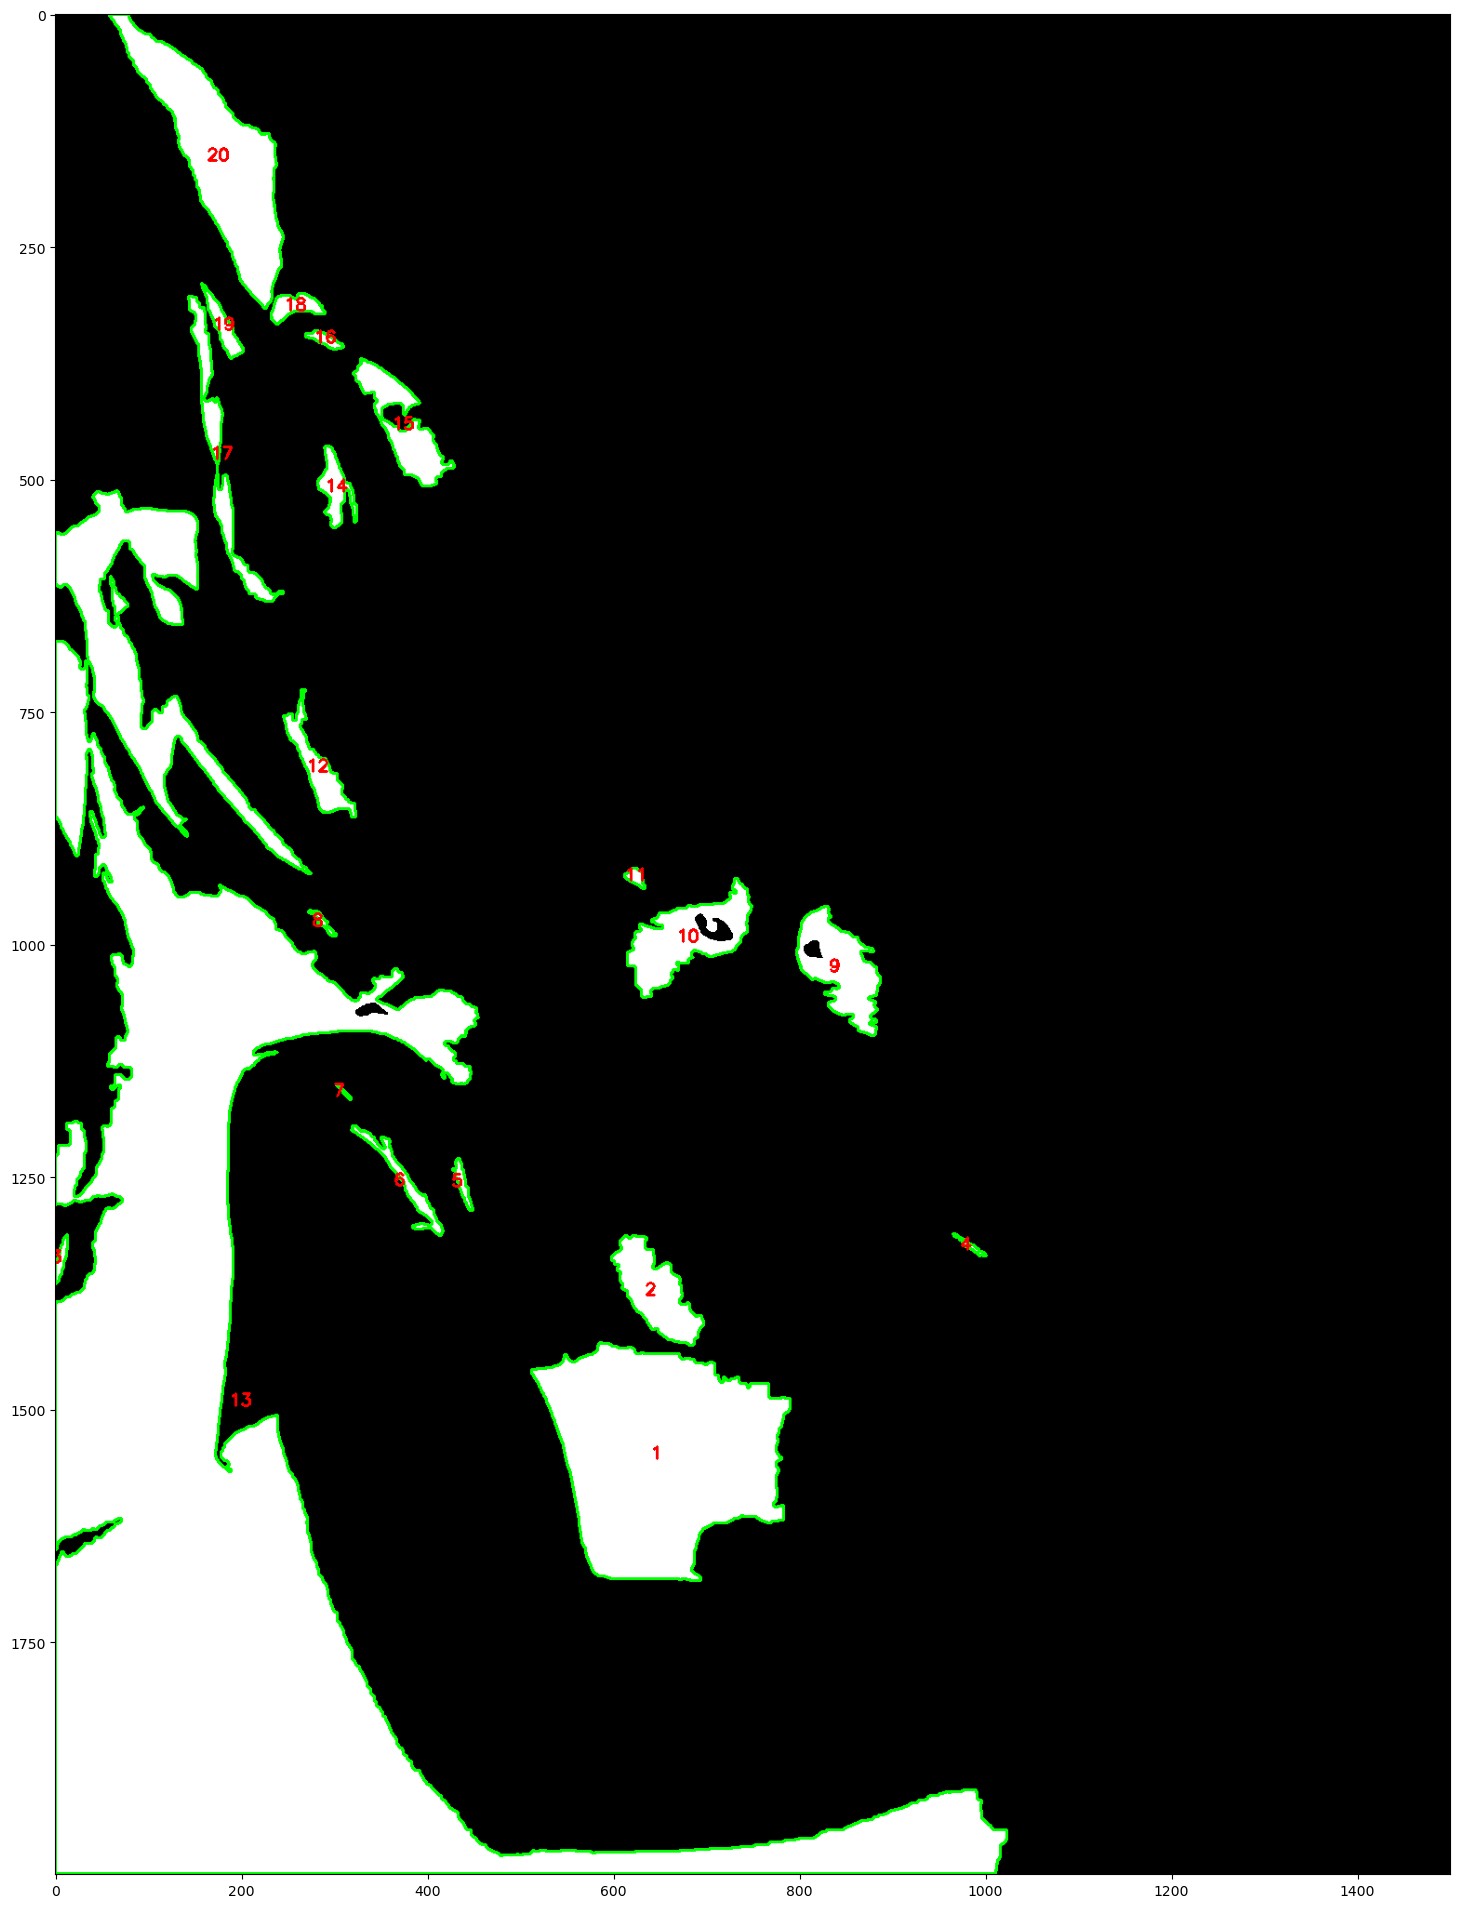

In [41]:
# Prepare the image for drawing (convert single channel mask to BGR)
output_image = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Define the number of divisions for each contour area
num_divisions = 10  # Adjust this value as needed

# Loop over all found contours
for i, contour in enumerate(contours):
    # Calculate moments for each contour
    M = cv2.moments(contour)
    
    area = cv2.contourArea(contour)
    print(f"Area of contour {i+1}: {area}")

    if M["m00"] != 0:
        # Calculate x, y coordinate of center
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        # Set some default values in case of error
        cX, cY = 0, 0

    # Draw the contour on the output image
    cv2.drawContours(output_image, [contour], -1, (0, 255, 0), 2)

    # Calculate the size of each division
    area = cv2.contourArea(contour)
    division_area = area / num_divisions

    # Loop over each division
    for division in range(num_divisions):
        # Calculate the center of the current division
        division_center = (division + 0.5) * division_area / area
        division_contour = np.array([[
            [cX - division_center, cY - division_center],
            [cX + division_center, cY - division_center],
            [cX + division_center, cY + division_center],
            [cX - division_center, cY + division_center]
        ]], dtype=np.int32)

        # Calculate moments for each division
        division_M = cv2.moments(division_contour)

        if division_M["m00"] != 0:
            # Calculate x, y coordinate of center
            division_cX = int(division_M["m10"] / division_M["m00"])
            division_cY = int(division_M["m01"] / division_M["m00"])
        else:
            # Set some default values in case of error
            division_cX, division_cY = 0, 0

        # Draw the number at the center of the division
        cv2.putText(output_image, str(i+1), (division_cX - 10, division_cY + 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)


plt.figure(figsize=(18, 32))
plt.imshow(output_image)

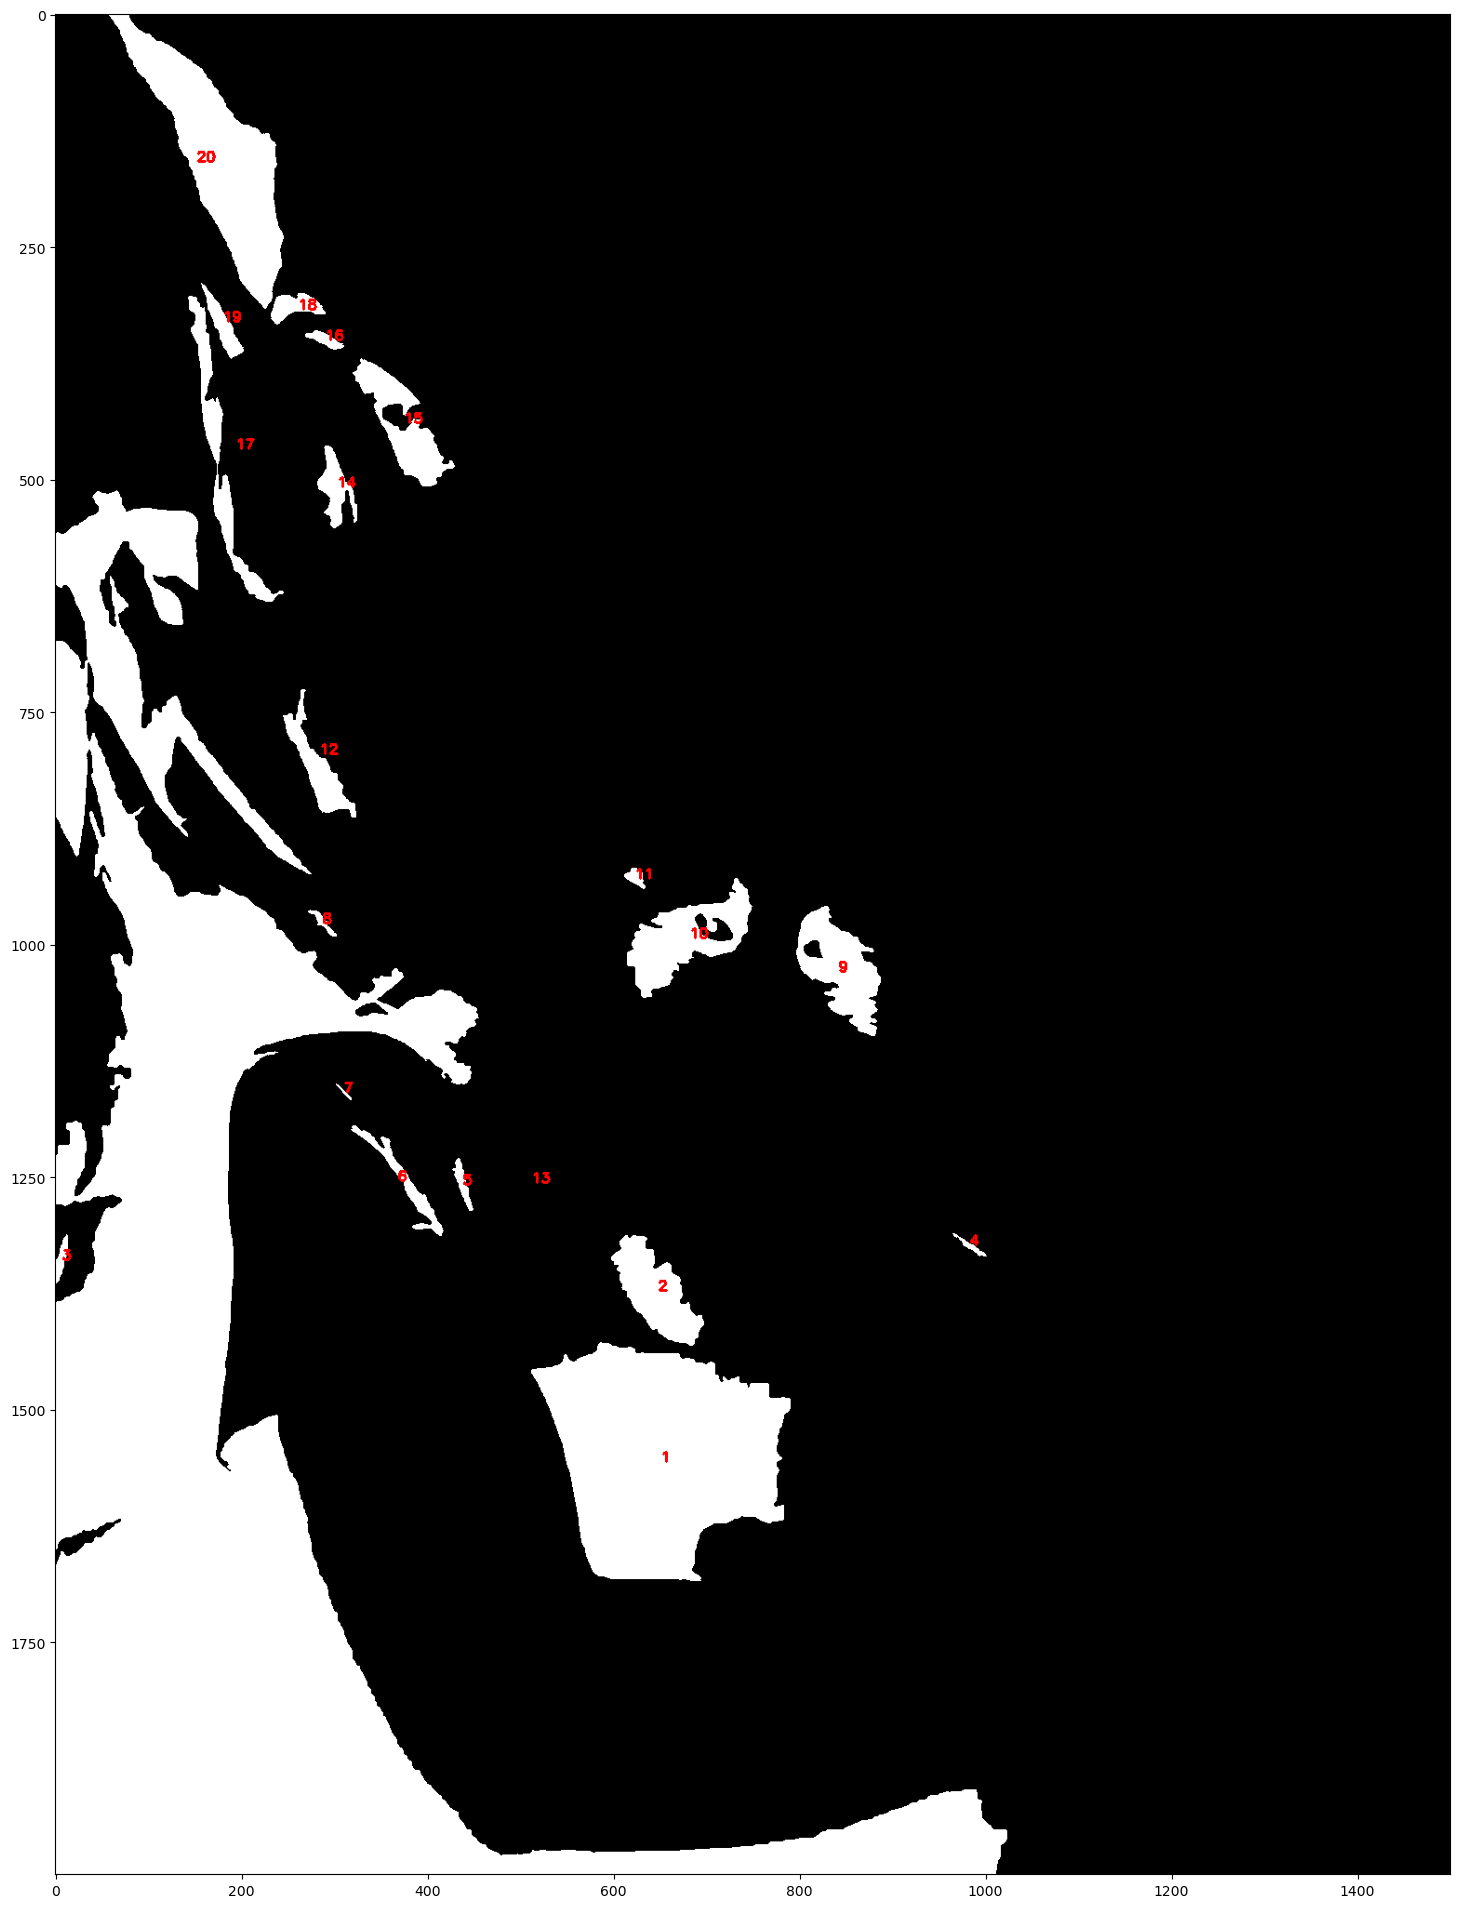

In [35]:


# Prepare the image for drawing (convert single channel mask to BGR)
output_image = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Create a blank mask with the same size as the original mask
mask_with_numbers = np.zeros_like(mask)

# Loop over all found contours
for i, contour in enumerate(contours):
    # Get bounding box coordinates
    x, y, w, h = cv2.boundingRect(contour)

    # Calculate coordinates for the text: placing numbers in the center of the bounding box
    cx, cy = x + w // 2, y + h // 2

    # Draw the index of the contour on the blank mask
    cv2.putText(mask_with_numbers, str(i + 1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 255, 2)

    # Draw the index of the contour on the output image
    cv2.putText(output_image, str(i + 1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Divide the contour area into a grid and place numbers at the center of each grid cell
    num_rows, num_cols = 3, 3  # Adjust as needed
    cell_width = w // num_cols
    cell_height = h // num_rows
    cell_counter = 0

    for r in range(num_rows):
        for c in range(num_cols):
            # Calculate the center of the current grid cell
            cell_cx = x + c * cell_width + cell_width // 2
            cell_cy = y + r * cell_height + cell_height // 2

            # Draw the number in the current grid cell
            cv2.putText(mask_with_numbers, str(cell_counter + 1), (cell_cx, cell_cy), cv2.FONT_HERSHEY_SIMPLEX, 0.3, 255, 1)

            # Increment cell counter
            cell_counter += 1

# Perform bitwise AND operation to ensure numbers only appear within the masked areas
masked_numbers = cv2.bitwise_and(mask_with_numbers, mask)

plt.figure(figsize=(18, 32))
plt.imshow(output_image)

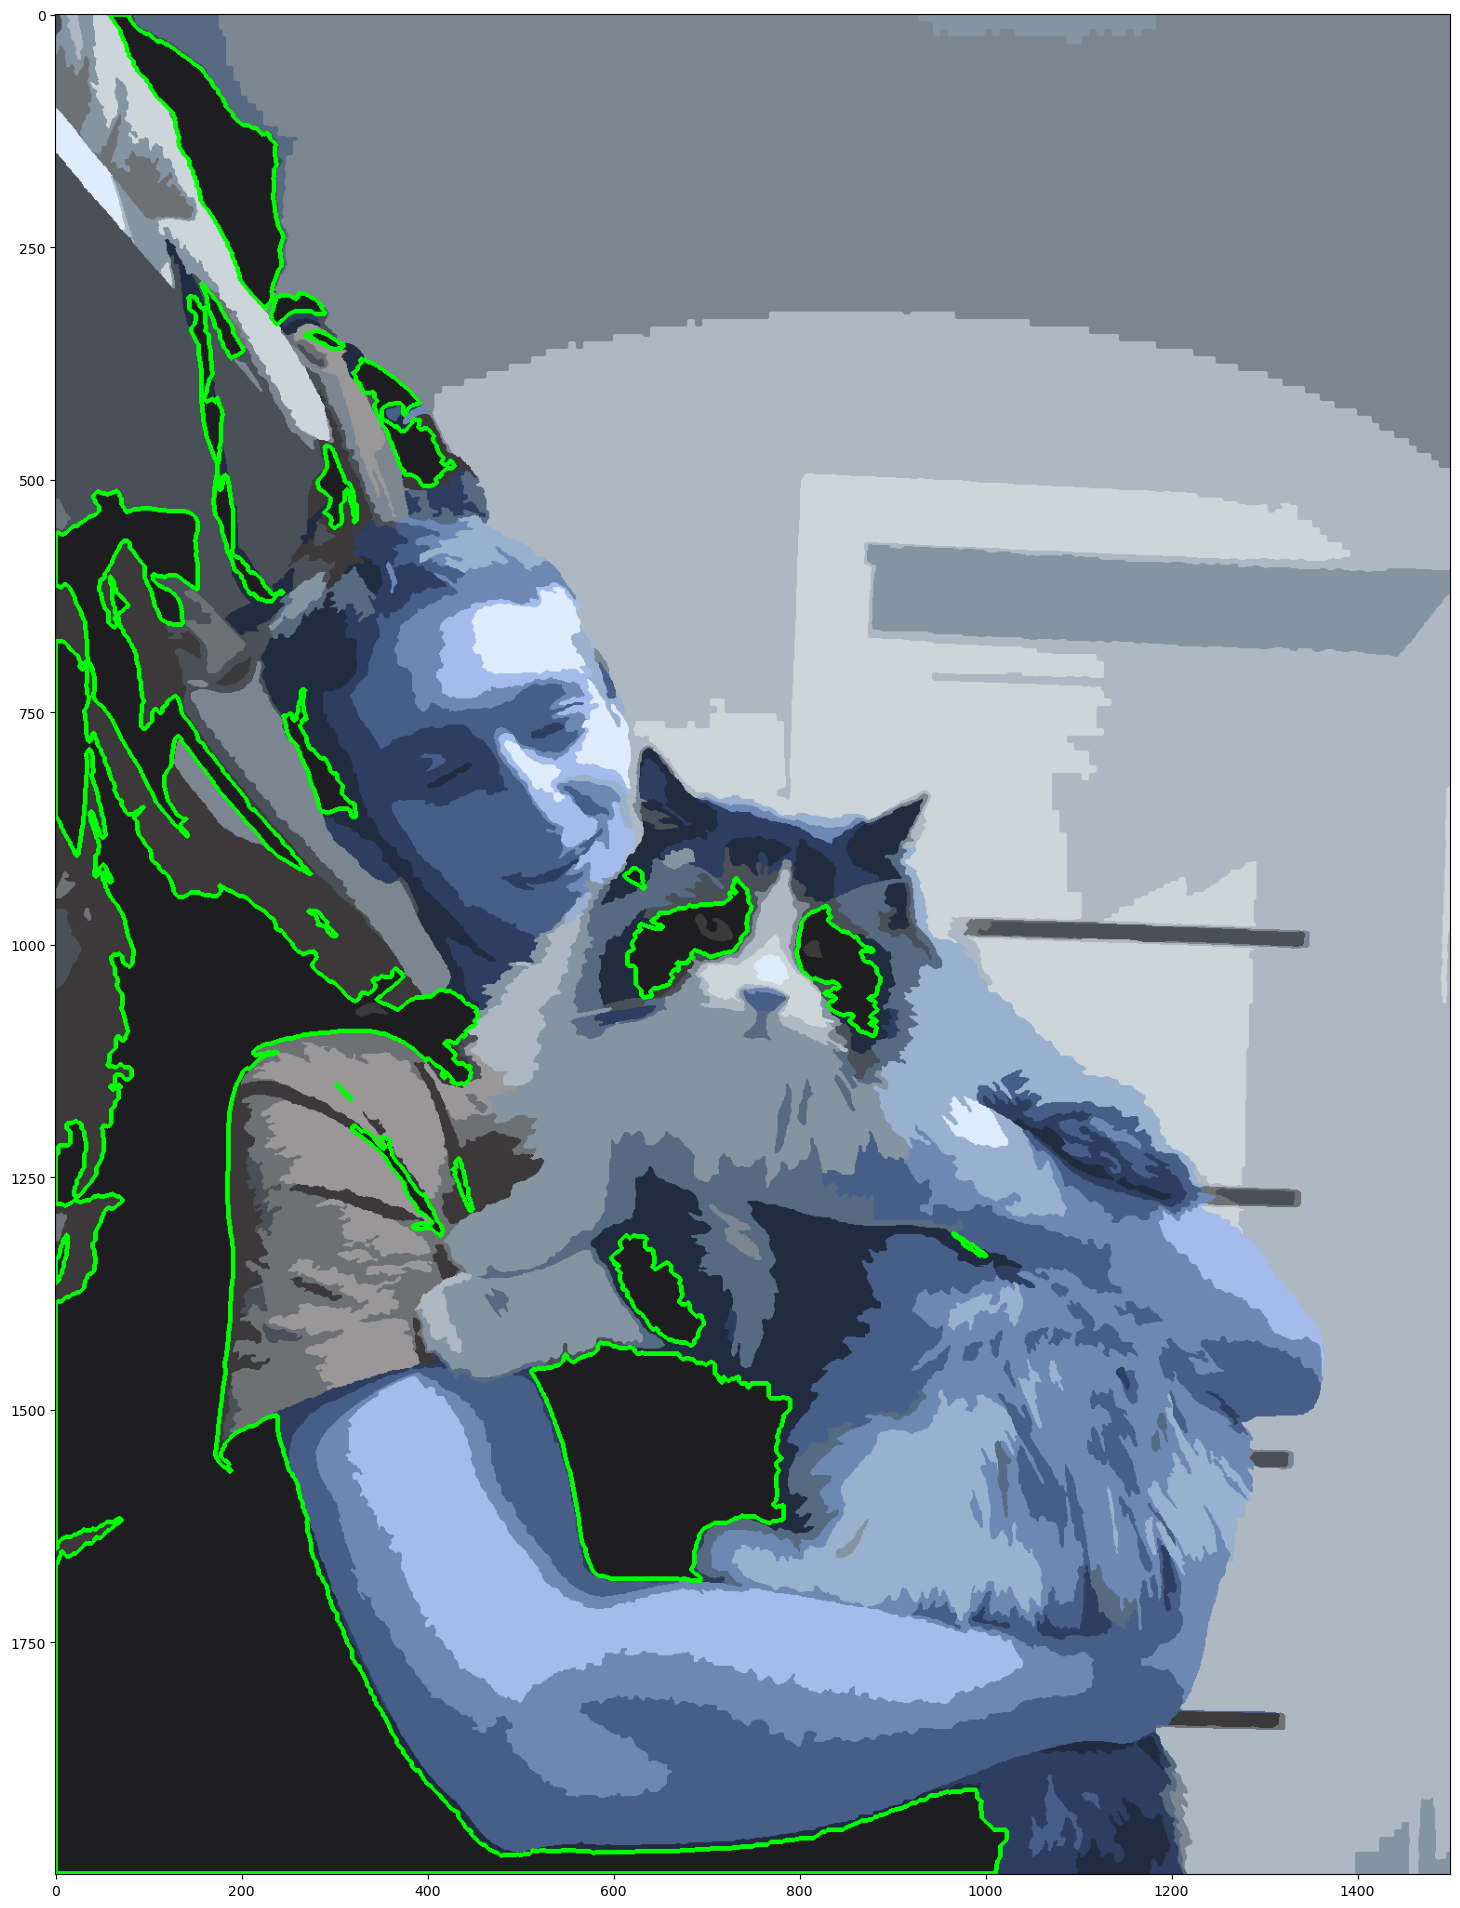

In [23]:
im = cv2.drawContours(result_image, contours, -1, (0, 255, 0), 3)
plt.figure(figsize=(18, 32))
plt.imshow(im)

In [ ]:
# Define the specific color you are looking for (in BGR)
target_color_bgr = colors[0]

# Create a mask that matches the target color exactly
mask = cv2.inRange(result_image, target_color_bgr, target_color_bgr)

# Optional: apply the mask to get the output with the colored areas
colored_output = cv2.bitwise_and(result_image, result_image, mask=mask)

# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image to visualize them
output_image = result_image.copy()
cv2.drawContours(output_image, contours, -1, (0, 255, 0), 3)  # Draw contours in green


